In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from dataset import NASBench101Dataset
from utils import get_flat_features, get_flat_features2, get_targets, get_targets2

In [6]:
%load_ext snakeviz

### Dataset load
- [] Different splits? (use `train_test_split`?)
- [] Test data should be unseen data

In [7]:
dataset = NASBench101Dataset('data/nasbench.hdf5', "172") # 860
dataset_test = NASBench101Dataset('data/nasbench.hdf5', "all")
dataset_size = len(dataset)

### Get Features
- [] Correlation analysis (can be done on current?)
- [] Additional Features 
- [] Better way of getting features (dataset.py or utils.py)
- [] Normalization check

In [8]:
%%snakeviz -t 'tmp'

train_data = get_flat_features2(dataset)
test_data = get_flat_features2(dataset_test)

train_targets = get_targets2(dataset)
test_targets = get_targets2(dataset_test)

 
*** Profile stats marshalled to file 'C:\\Users\\simon\\AppData\\Local\\Temp\\tmpktgivxx7'.
Opening SnakeViz in a new tab...


### Linear Regression
- [x] Module Imports check
- [x] Save & Load 
- [x] Training & Retraining
- [x] Predicting
- [x] Plotting
- [x] Evaluation (Kendall is too good?)
- [x] Parameter usefulness

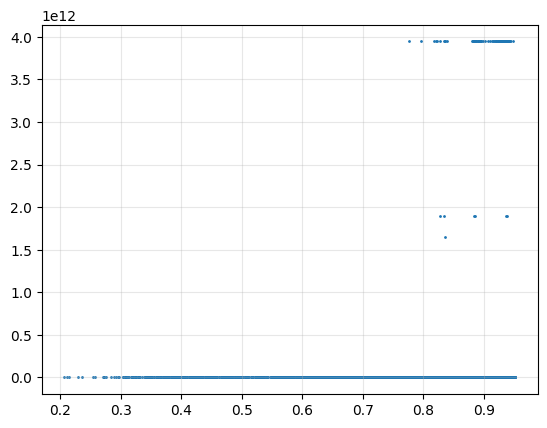

In [9]:
from predictors.linear_regression import LRPredictor

lr_predictor = LRPredictor()
lr_predictor.fit(train_data, train_targets)

lr_predictions = lr_predictor.predict(test_data)

plt.scatter(test_targets, lr_predictions, s=1)
plt.grid(alpha=0.3)
plt.show()

In [10]:
print(lr_predictor.evaluate(test_data, test_targets))

{'rmse': 56054894096.841255, 'mae': 812885719.2814145, 'mse': 3.1421511522080884e+21, 'pearson': -0.0018884364253225492, 'spearman': 0.6571406318072646, 'kendalltau': 0.4729186826825789, 'r2_score': -3.688411240656617e+24}


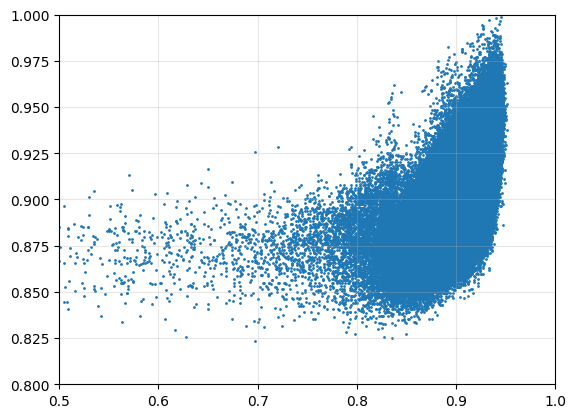

In [11]:
plt.scatter(test_targets, lr_predictions, s=1)
plt.grid(alpha=0.3)
plt.xlim(0.5, 1)
plt.ylim(0.8, 1)
plt.show()

LinearPredictor:
  Model Status: fitted
  Encoding Type: adj_onehot
  Search Space Type: nasbench101
  Model Architecture: LinearRegression()
  Mean (train): 0.9085
  Std (train): 0.0265

LinearPredictor:
  Model Status: fitted
  Encoding Type: adj_onehot
  Search Space Type: nasbench101
  Model Architecture: LinearRegression()
  Mean (train): 0.9085
  Std (train): 0.0265



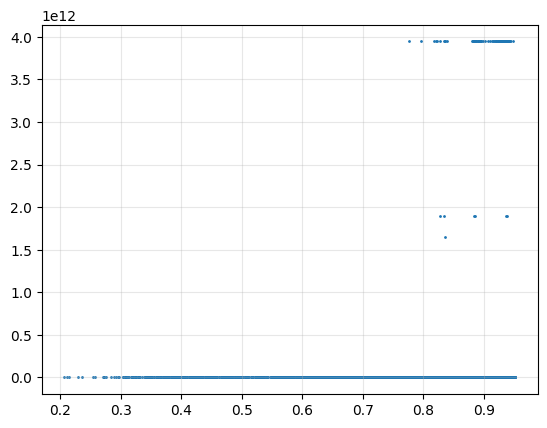

In [12]:
lr_predictor.save("models/lr_predictor_172.pkl")

print(lr_predictor)
lr2 = LRPredictor()
lr2.load("models/lr_predictor_172.pkl")
print(lr2)

lr2.refit(train_data, train_targets)
lr2_predictions = lr2.predict(test_data)

plt.scatter(test_targets, lr2_predictions, s=1)
plt.grid(alpha=0.3)
plt.show()

### Random Forest
- [x] Module Imports check
- [x] Save & Load 
- [x] Training & Retraining
- [x] Predicting
- [x] Plotting
- [x] Evaluation
- [x] Parameter usefulness
- [x] Hyperparameter tuning
- [x] Repr, Str

In [13]:
from predictors.random_forest import RFPredictor

rf_predictor = RFPredictor()
print(rf_predictor)

RFPredictor:
  Model Status: not fitted
  Encoding Type: adj_onehot
  Search Space Type: nasbench101
  Model Architecture: None
  Hyperparameters: default
  Mean (train): None
  Std (train): None



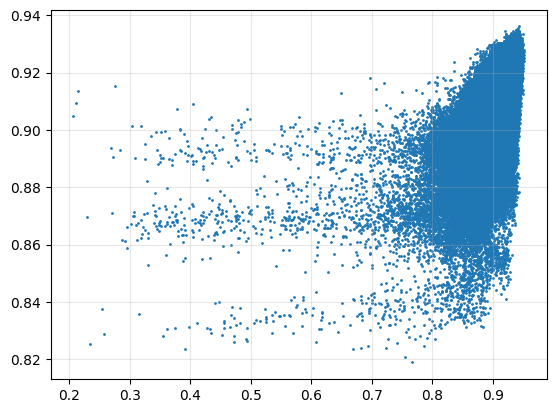

In [14]:
rf_predictor.fit(train_data, train_targets)

rf_predictions = rf_predictor.predict(test_data)

plt.scatter(test_targets, rf_predictions, s=1)
plt.grid(alpha=0.3)
plt.show()

In [16]:
print(rf_predictor)

RFPredictor:
  Model Status: fitted
  Encoding Type: adj_onehot
  Search Space Type: nasbench101
  Model Architecture: RandomForestRegressor(bootstrap=False, max_features=0.17055852159745608,
                      min_samples_leaf=2, n_estimators=116)
  Hyperparameters: n_estimators=116, max_features=0.17055852159745608, min_samples_leaf=2, min_samples_split=2, bootstrap=False
  Mean (train): 0.9085
  Std (train): 0.0265



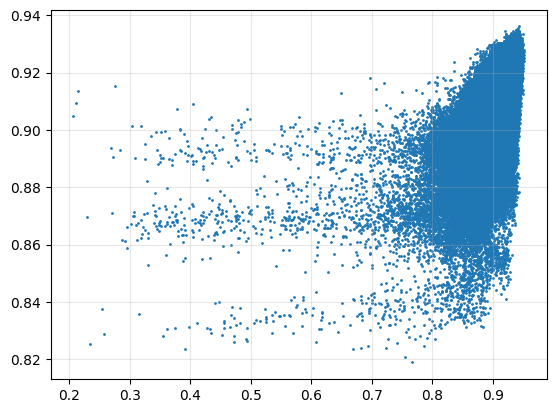

In [17]:
rf_predictor.save('models/rf_predictor3.pkl')

rf2 = RFPredictor()
rf2.load('models/rf_predictor3.pkl')

rf2_predictions = rf2.predict(test_data)

plt.scatter(test_targets, rf2_predictions, s=1)
plt.grid(alpha=0.3)
plt.show()

In [18]:
print(rf_predictor.get_hyperparams())
print(rf2.get_hyperparams())

{'n_estimators': 116, 'max_features': 0.17055852159745608, 'min_samples_leaf': 2, 'min_samples_split': 2, 'bootstrap': False}
{'n_estimators': 116, 'max_features': 0.17055852159745608, 'min_samples_leaf': 2, 'min_samples_split': 2, 'bootstrap': False}


In [22]:
import time 

start = time.time()

best_hyperparams, best_cv_score = rf_predictor.run_hpo(
    xtrain=train_data,
    ytrain=train_targets,
    start_time=start,
    metric="kendalltau",
    max_iters=5000,
    verbose=True
)

Starting cross validation
[0/5000] cv_score=0.3915, params={'n_estimators': 102, 'max_features': 0.814354694662315, 'min_samples_leaf': 18, 'min_samples_split': 11, 'bootstrap': False}
--> new best score = 0.39151002423118136, hparams = {'n_estimators': 102, 'max_features': 0.814354694662315, 'min_samples_leaf': 18, 'min_samples_split': 11, 'bootstrap': False}
patience = 0/50
[1/5000] cv_score=0.4049, params={'n_estimators': 86, 'max_features': 0.10581829183715025, 'min_samples_leaf': 10, 'min_samples_split': 15, 'bootstrap': False}
--> new best score = 0.40494695910913686, hparams = {'n_estimators': 86, 'max_features': 0.10581829183715025, 'min_samples_leaf': 10, 'min_samples_split': 15, 'bootstrap': False}
patience = 0/50
[2/5000] cv_score=0.3974, params={'n_estimators': 96, 'max_features': 0.482483622178078, 'min_samples_leaf': 19, 'min_samples_split': 5, 'bootstrap': False}
patience = 1/50
[3/5000] cv_score=0.3792, params={'n_estimators': 56, 'max_features': 0.6069745106117215, 'mi

### XGBoost
- [x] Module Imports check
- [x] Save & Load 
- [x] Training & Retraining
- [x] Predicting
- [x] Plotting
- [x] Evaluation (Kendall is too good?)
- [x] Parameter usefulness

In [24]:
from predictors.xgb import XGBPredictor

xgb_predictor = XGBPredictor()
print(xgb_predictor)

XGBPredictor:
  Model Status: not fitted
  Encoding Type: adj_one_hot
  Search Space Type: nasbench101
  Model Architecture: None
  Hyperparameters: default
  Mean (train): None
  Std (train): None



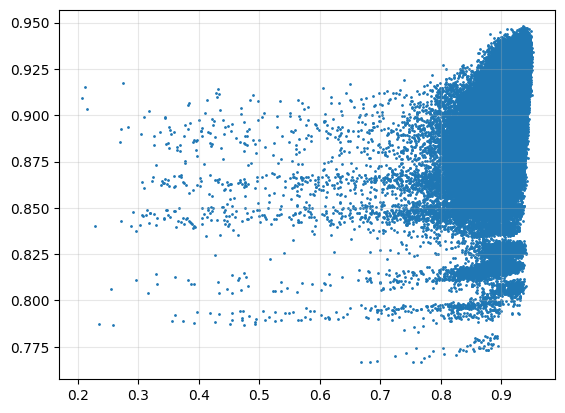

In [25]:
xgb_predictor.fit(train_data, train_targets)

xgb_predictions = xgb_predictor.predict(test_data)

plt.scatter(test_targets, xgb_predictions, s=1)
plt.grid(alpha=0.3)
plt.show()

In [26]:
print(xgb_predictor)

XGBPredictor:
  Model Status: fitted
  Encoding Type: adj_one_hot
  Search Space Type: nasbench101
  Model Architecture: XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
  Hyperparameters: objective=reg:squarederror, eval_metric=rmse, booster=gbtree, max_depth=6, min_child_weight=1, colsample_bytree=1, learning_ra

In [27]:
print(xgb_predictor.evaluate(test_data, test_targets))

{'rmse': 0.025246360358039018, 'mae': 0.01510277206391272, 'mse': 0.0006373787113279641, 'pearson': 0.5318981301301889, 'spearman': 0.635809965117359, 'kendalltau': 0.45480923302856757, 'r2_score': 0.2518135858088081}


In [28]:
xgb_predictor.save('models/xgb_predictor3.pkl')

xgb2 = XGBPredictor()

xgb2.load('models/xgb_predictor3.pkl')

In [29]:
print(xgb2)
print(xgb_predictor.get_hyperparams())
print(xgb2.get_hyperparams())

XGBPredictor:
  Model Status: fitted
  Encoding Type: adj_one_hot
  Search Space Type: nasbench101
  Model Architecture: XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
  Hyperparameters: objective=reg:squarederror, eval_metric=rmse, booster=gbtree, max_depth=6, min_child_weight=1, colsample_bytree=1, learning_ra

In [30]:
import time 

start = time.time()

best_hyperparams, best_cv_score = xgb_predictor.run_hpo(
    xtrain=train_data,
    ytrain=train_targets,
    start_time=start,
    metric="kendalltau",
    max_iters=5000,
    k=5,
    verbose=True
)

Starting cross validation
[0/5000] cv_score=0.4454, params={'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'booster': 'gbtree', 'max_depth': 4, 'min_child_weight': 6, 'colsample_bytree': 0.9369062694919504, 'learning_rate': 0.04608628810141053, 'colsample_bylevel': 0.5715543486338273}
--> new best score = 0.44538101350706283, hparams = {'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'booster': 'gbtree', 'max_depth': 4, 'min_child_weight': 6, 'colsample_bytree': 0.9369062694919504, 'learning_rate': 0.04608628810141053, 'colsample_bylevel': 0.5715543486338273}
patience = 0/50
[1/5000] cv_score=0.4454, params={'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'booster': 'gbtree', 'max_depth': 6, 'min_child_weight': 5, 'colsample_bytree': 0.9027915369863908, 'learning_rate': 0.0011693544224903479, 'colsample_bylevel': 0.04574673635023385}
patience = 1/50
[2/5000] cv_score=0.4454, params={'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'booster': 'gbtree', 'm

### GCN
- [] Module Imports check
- [] Save & Load 
- [] Training & Retraining
- [] Predicting
- [] Plotting
- [] Evaluation (Kendall is too good?)
- [] Parameter usefulness

In [32]:
gcn_train_data = np.array(list([a for a in dataset]))
gcn_test_data = np.array(list([a for a in dataset_test]))


In [33]:
from predictors.gcn import GCNPredictor

gcn_predictor = GCNPredictor()
print(gcn_predictor)

GCNPredictor:
  Model Status: not fitted
  Encoding Type: gcn_graph
  Search Space Type: nasbench101
  Model Architecture: None
  Hyperparameters: default
  Mean (train): None
  Std (train): None



[05/10 00:59:02] INFO (root) Epoch 1/300, Loss: 1.0006, MSE: 10005.9629
[05/10 00:59:03] INFO (root) Epoch 2/300, Loss: 1.0035, MSE: 10034.7430
[05/10 00:59:03] INFO (root) Epoch 3/300, Loss: 1.0030, MSE: 10030.4873
[05/10 00:59:03] INFO (root) Epoch 4/300, Loss: 0.9929, MSE: 9928.9110
[05/10 00:59:03] INFO (root) Epoch 5/300, Loss: 0.9924, MSE: 9923.5635
[05/10 00:59:03] INFO (root) Epoch 6/300, Loss: 0.9923, MSE: 9922.7239
[05/10 00:59:03] INFO (root) Epoch 7/300, Loss: 0.9913, MSE: 9913.4561
[05/10 00:59:03] INFO (root) Epoch 8/300, Loss: 0.9907, MSE: 9906.7830
[05/10 00:59:04] INFO (root) Epoch 9/300, Loss: 0.9890, MSE: 9890.4050
[05/10 00:59:04] INFO (root) Epoch 10/300, Loss: 0.9860, MSE: 9860.4332
[05/10 00:59:04] INFO (root) Epoch 11/300, Loss: 0.9827, MSE: 9826.8053
[05/10 00:59:04] INFO (root) Epoch 12/300, Loss: 0.9775, MSE: 9775.0271
[05/10 00:59:04] INFO (root) Epoch 13/300, Loss: 0.9720, MSE: 9720.3623
[05/10 00:59:04] INFO (root) Epoch 14/300, Loss: 0.9644, MSE: 9643.510

c:\Users\simon\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\_utils\collate.py:176: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:233.)
  return torch.as_tensor(batch)


[05/10 00:59:45] INFO (root) Batch 5, Loss: 1.3521, MSE: 13520.8682
[05/10 00:59:45] INFO (root) Batch 6, Loss: 1.3405, MSE: 13404.9738
[05/10 00:59:45] INFO (root) Batch 7, Loss: 1.3306, MSE: 13306.0619
[05/10 00:59:45] INFO (root) Batch 8, Loss: 1.3172, MSE: 13172.0700
[05/10 00:59:45] INFO (root) Batch 9, Loss: 1.3150, MSE: 13150.1714
[05/10 00:59:45] INFO (root) Batch 10, Loss: 1.3227, MSE: 13227.4903
[05/10 00:59:45] INFO (root) Batch 11, Loss: 1.3251, MSE: 13251.4517
[05/10 00:59:45] INFO (root) Batch 12, Loss: 1.3174, MSE: 13173.6359
[05/10 00:59:45] INFO (root) Batch 13, Loss: 1.3082, MSE: 13082.0348
[05/10 00:59:45] INFO (root) Batch 14, Loss: 1.3174, MSE: 13173.9450
[05/10 00:59:45] INFO (root) Batch 15, Loss: 1.3119, MSE: 13119.2375
[05/10 00:59:45] INFO (root) Batch 16, Loss: 1.3129, MSE: 13128.7666
[05/10 00:59:45] INFO (root) Batch 17, Loss: 1.3078, MSE: 13078.0229
[05/10 00:59:45] INFO (root) Batch 18, Loss: 1.3105, MSE: 13104.8772
[05/10 00:59:45] INFO (root) Batch 19, 

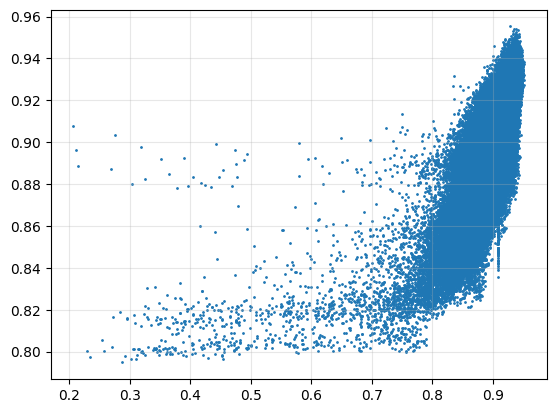

In [34]:
gcn_predictor.fit(gcn_train_data, train_targets)

gcn_predictions = gcn_predictor.predict(gcn_test_data)

plt.scatter(test_targets, gcn_predictions, s=1)
plt.grid(alpha=0.3)
plt.show()

In [35]:
print(gcn_predictor)

GCNPredictor:
  Model Status: fitted
  Encoding Type: gcn_graph
  Search Space Type: nasbench101
  Model Architecture: NeuralPredictorModel(
  (gcn): ModuleList(
    (0): DirectedGraphConvolution (5 -> 144)
    (1): DirectedGraphConvolution (144 -> 144)
    (2): DirectedGraphConvolution (144 -> 144)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (fc1): Linear(in_features=144, out_features=128, bias=False)
  (fc2): Linear(in_features=128, out_features=1, bias=False)
)
  Hyperparameters: gcn_hidden=144, batch_size=10, lr=0.0001, wd=0.001, epochs=300, eval_batch_size=1000
  Mean (train): 0.9085
  Std (train): 0.0265



In [36]:
gcn_predictor.save('models/gcn_172_random2.pkl')

gcn_new2 = GCNPredictor()
gcn_new2.load('models/gcn_172_random2.pkl')

In [37]:
print(gcn_new2)

GCNPredictor:
  Model Status: fitted
  Encoding Type: gcn_graph
  Search Space Type: nasbench101
  Model Architecture: NeuralPredictorModel(
  (gcn): ModuleList(
    (0): DirectedGraphConvolution (5 -> 144)
    (1): DirectedGraphConvolution (144 -> 144)
    (2): DirectedGraphConvolution (144 -> 144)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (fc1): Linear(in_features=144, out_features=128, bias=False)
  (fc2): Linear(in_features=128, out_features=1, bias=False)
)
  Hyperparameters: gcn_hidden=144, batch_size=10, lr=0.0001, wd=0.001, epochs=300, eval_batch_size=1000
  Mean (train): 0.9085
  Std (train): 0.0265



### MLP
- [] Module Imports check
- [] Save & Load 
- [] Training & Retraining
- [] Predicting
- [] Plotting
- [] Evaluation (Kendall is too good?)
- [] Parameter usefulness

In [38]:
from predictors.mlp import MLPPredictor

mlp_predictor = MLPPredictor()
print(mlp_predictor)

MLPPredictor:
  Model Status: not fitted
  Encoding Type: adj_onehot
  Search Space Type: nasbench101
  Model Architecture: None
  Hyperparameters: default
  Mean (train): None
  Std (train): None



[05/10 01:02:29] INFO (root) Epoch 1, Loss: 1.9529
[05/10 01:02:29] INFO (root) Epoch 2, Loss: 1.9287
[05/10 01:02:29] INFO (root) Epoch 3, Loss: 1.9047
[05/10 01:02:29] INFO (root) Epoch 4, Loss: 1.8806
[05/10 01:02:29] INFO (root) Epoch 5, Loss: 1.8566
[05/10 01:02:29] INFO (root) Epoch 6, Loss: 1.8324
[05/10 01:02:29] INFO (root) Epoch 7, Loss: 1.8078
[05/10 01:02:29] INFO (root) Epoch 8, Loss: 1.7837
[05/10 01:02:29] INFO (root) Epoch 9, Loss: 1.7588
[05/10 01:02:29] INFO (root) Epoch 10, Loss: 1.7224
[05/10 01:02:29] INFO (root) Epoch 11, Loss: 1.6578
[05/10 01:02:29] INFO (root) Epoch 12, Loss: 1.5749
[05/10 01:02:29] INFO (root) Epoch 13, Loss: 1.5272
[05/10 01:02:30] INFO (root) Epoch 14, Loss: 1.5276
[05/10 01:02:30] INFO (root) Epoch 15, Loss: 1.4485
[05/10 01:02:30] INFO (root) Epoch 16, Loss: 1.4295
[05/10 01:02:30] INFO (root) Epoch 17, Loss: 1.3781
[05/10 01:02:30] INFO (root) Epoch 18, Loss: 1.3416
[05/10 01:02:30] INFO (root) Epoch 19, Loss: 1.3082
[05/10 01:02:30] INFO

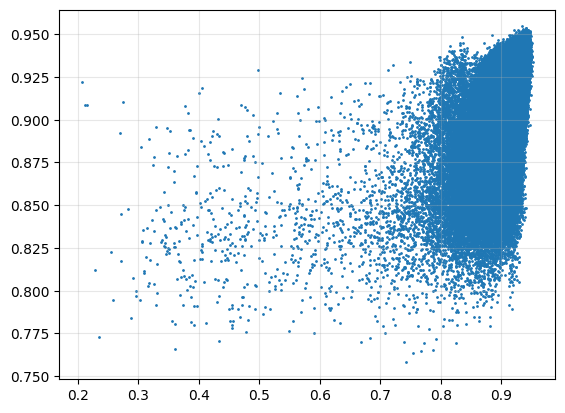

In [39]:
mlp_predictor.fit(train_data, train_targets)

mlp_predictions = mlp_predictor.predict(test_data)

plt.scatter(test_targets, mlp_predictions, s=1)
plt.grid(alpha=0.3)
plt.show()

In [40]:
mlp_predictor.save('models/mlp_predictor_172.pkl')

mlp2 = MLPPredictor()
mlp2.load('models/mlp_predictor_172.pkl', train_data.shape[1])

TypeError: MLPPredictor.load() missing 1 required positional argument: 'input_dims'